In [64]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some, axes_dict
from csbdeep.io import save_training_data
from csbdeep.data import RawData, create_patches
from csbdeep.data.transform import anisotropic_distortions

In [65]:
x = imread('data/retina/200115_SMT_MCF7_CELL01_GAPDH_RNA_MMStack_Pos0.ome.tif')
print('image size         =', x.shape)

image size         = (336, 448)


Notice that the source and target are the same folder - which means it will use the image in that given folder to produce semi synthetic data

In [66]:
raw_data = RawData.from_folder (
    basepath    = 'data',
    source_dirs = ['retina'],
    target_dir  = 'retina',
    axes        = 'CYX',
)

I changed the Sub Sampling factor from 10.2 to 5.1 


psf_axes = If None, psf axes are assumed to be the same as of the image that it is applied to

psf = Point spread function (PSF) that is supposed to mimic blurring of the microscope due to reduced axial resolution. Set to None to disable.

Read the docs for more info: 
http://csbdeep.bioimagecomputing.com/doc/datagen.html#anisotropic-distortions

In [67]:
anisotropic_transform = anisotropic_distortions (
    subsample = 5.1,
    psf       = np.ones((3,3))/9, # use the actual PSF here
    psf_axes  = None,
)


Make sure the patch size matches the patch size in the Training data set that we created before

In [68]:
X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
    patch_size          = (128,128),
    n_patches_per_image = 4,
    transforms          = [anisotropic_transform],
)

    1 raw images x    1 transformations   =     1 images
    1 images     x    4 patches per image =     4 patches in total
Input data:
data: target='retina', sources=['retina'], axes='CYX', pattern='*.tif*'
Transformations:
1 x Anisotropic distortion (along X axis)
Patch size:
128 x 128


100%|██████████| 1/1 [00:00<00:00, 13.60it/s]


In [69]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

shape of X,Y = (4, 1, 128, 128)
axes  of X,Y = SCYX


In [70]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

shape of X,Y = (4, 1, 128, 128)
axes  of X,Y = SCYX


In [71]:
save_training_data('data/my_training_data.npz', X, Y, XY_axes)

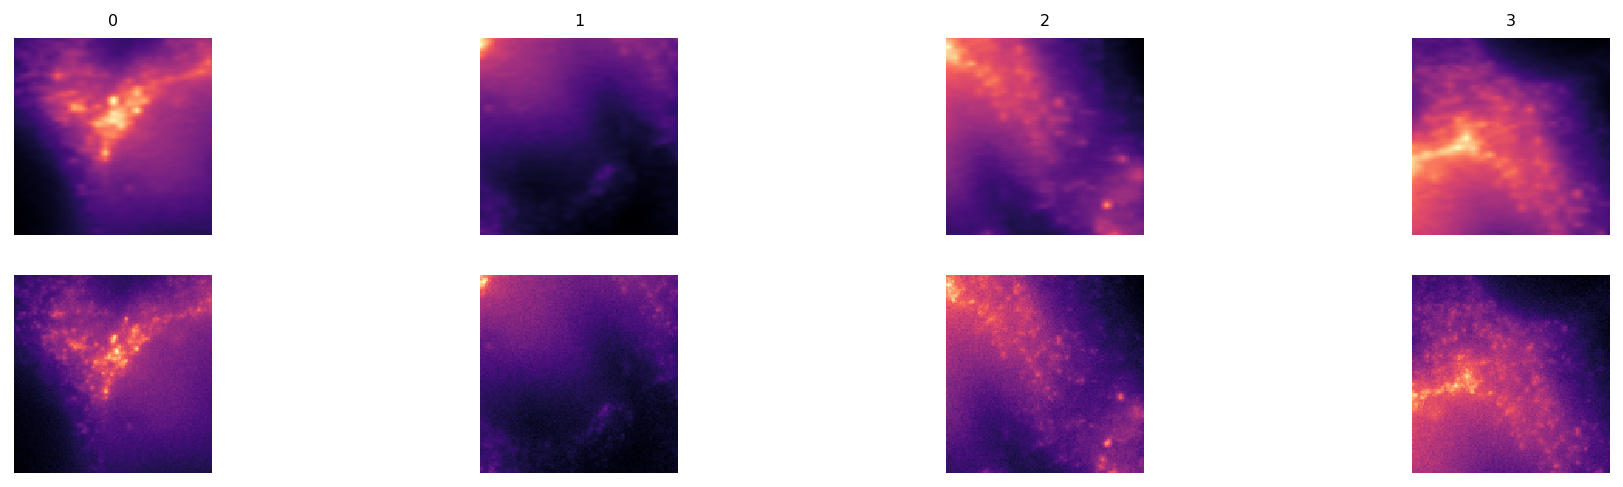

In [72]:
for i in range(1):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1))
    plot_some(np.moveaxis(X[sl],1,-1),np.moveaxis(Y[sl],1,-1),title_list=[np.arange(sl.start,sl.stop)])
    plt.show()
None;